In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('/Users/cd8607/Documents/Lammps_MD/', 'git_folder', 'Classes'))
import EAM_Fitting_Serial
import Handle_PotFiles
import time
import glob
from scipy.optimize import minimize
os.chdir('/Users/cd8607/Documents/Lammps_MD')
from scipy.integrate import simpson
from scipy.signal import find_peaks

[ 0.47032492  3.57980814 -1.98331083  1.51628033  0.40155792  0.78864342
  0.07670783 -0.09653018  0.77539716 -1.27883287 -1.16005199 -5.59395761
  0.11572778  0.76064191  9.55504205]
[  0.3353699    3.02318298  -1.85384235   1.34987261   0.49297461
   0.61681111   0.04975397  -0.27154839   1.04551642  -1.04220294
  -1.03149597 -11.29969088   0.1611396    0.62071283  10.94796057]
[ 0.42192432  2.13721963 -2.412605    0.85715129  0.36787192  0.68905578
  0.2246535  -0.12243818  0.03263409 -1.32355259 -0.47714607  0.58269106
  0.51546338  0.23195523  8.24407233]
[  0.24568293   4.79185387  -2.94653036   1.47627043   0.59474506
   0.42447707   0.06771673  -0.26668359   0.33781269  -0.28768688
  -0.78090088 -16.72165108  -0.09150883  -0.16723894  14.13731909]
[ 0.19725363  4.01110118 -2.21979303  2.05929662  0.48687434  0.84377807
  0.16495025  0.09196214  0.51041136 -1.72683316 -0.95189443 -5.00823796
  0.87203284  0.40679687  7.04531693]
[ 2.18417044e-01  4.17866624e+00 -3.14610849e+00  

KeyboardInterrupt: 

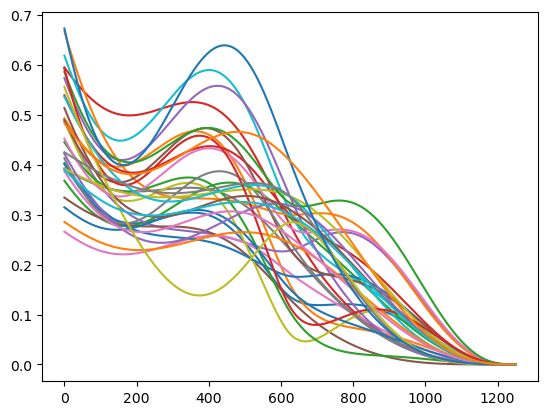

In [21]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')

n_knots = {}
n_knots['He_F'] = 3
n_knots['He_p'] = 3
n_knots['W-He'] = 4
n_knots['He-He'] = 0
n_knots['H-He'] = 0

eam_fit = EAM_Fitting_Serial.Fit_EAM_Potential(pot, n_knots, pot_params, potlines, None, 0, '')

for file_idx in range(112):
    samples = np.loadtxt('Gaussian_Samples_2/Filtered_Samples_%d.txt' % file_idx)
    loss = np.loadtxt('Gaussian_Samples_2/Filtered_Loss_%d.txt' % file_idx)

    for i, sample in enumerate(samples):
        eam_fit.sample_to_file(sample)

        he_p = eam_fit.pot_lammps['He_p']
        peaks, _ = find_peaks(he_p)

        # plt.plot(he_p)

        y_peak = he_p[peaks].max()

        if y_peak < he_p[0]:
            print(sample)            
        # print(y_peak)


In [26]:
x = np.array([0, 0, 1, 2, 3])

(not len(np.unique(x)) == len(x))*100

100

In [7]:
(80 * 2 * 100)/3600

4.444444444444445